# Credits

* **Author** : Aurelio Murolo ;
* **Date** : March, 2025 ;
* **Git-Hub** : [University Project Repository](https://github.com/AurelioMurolo/University-Projects) .

# Modules Import & Agnostic Device Setting

In [ ]:
# Must
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
from scipy import stats

# Model
import torch
from torch import nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms

!pip install -q torchinfo
from torchinfo import summary
!pip install -q torchmetrics
from torchmetrics.classification import Accuracy, MulticlassRecall, MulticlassPrecision, MulticlassF1Score

# Control Bar
!pip install -q tqdm
from tqdm.auto import tqdm

In [ ]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print("The available device is: ", device)

The available device is:  cuda


# Code Reproducibility

In according to the official documentation about [Reproducibility](https://pytorch.org/docs/stable/notes/randomness.html):

> As long as `torch.manual_seed()` is set to a constant at the beginning of an application and all **other sources of nondeterminism** have been eliminated, the same series of random numbers will be generated each time the application is run in the same environment.

The other sources of nondeterminism include both the seeds of other libraries and the intrinsical randomness of the algorithms used by Pytorch for its operations.

Although a good reproducibility may cause a decrese both in performances and speed, it gurantees the optimal condition for the experimentations, Galileo Galilei *docet* . In order to decrees the non - deterministic behaviour we can run the following line of code.





In [ ]:
seed = 42

# Torch
torch.manual_seed(seed)  # Seed for both CPU and GPU
torch.cuda.manual_seed(seed)  # Seed for GPU random number generation
torch.cuda.manual_seed_all(seed)  # For multi-GPU

torch.backends.cudnn.benchmark = False  # Deterministically select an algorithm if True
torch.backends.cudnn.deterministic = False # if True, only nondeterministic algorithms are available they will throw a RuntimeError when called
torch.Generator().manual_seed(seed)  # Seed for batch shuffling

# Numpy
np.random.seed(seed)

# Python
random.seed(seed)

You can find the full list of the normally-nondeterministic operations that will act deterministically when `torch.backends.cudnn.deterministic = True` at the following [link](https://pytorch.org/docs/stable/generated/torch.use_deterministic_algorithms.html#torch.use_deterministic_algorithms) .

In the end it's important to underline that it sufficient to call all the above functions only once at the beginning of the script, especially on a Jupyter Notebook like this where sometimes there are some "mis-comunication" among the cell of code. Anyway as you will se i still called them toI do it to avoid any possible problems.

# Usefull Functions

In [ ]:
def plot_training_results(epochs, train_losses, val_losses, train_accuracies, val_accuracies):
    """
    Plots the training loss, validation loss, training accuracy, and validation accuracy trends.

    Parameters:
    epochs (int): Number of epochs
    train_losses (list): List of training loss values
    val_losses (list): List of validation loss values
    train_accuracies (list): List of training accuracy values
    val_accuracies (list): List of validation accuracy values
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Loss plot
    axes[0].plot(range(epochs), train_losses, label='Train Loss', color='blue')
    axes[0].plot(range(epochs), val_losses, label='Val Loss', color='red')
    axes[0].set_title('Loss Trend')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    # Accuracy plot
    axes[1].plot(range(epochs), train_accuracies, label='Train Accuracy', color='blue')
    axes[1].plot(range(epochs), val_accuracies, label='Val Accuracy', color='red')
    axes[1].set_title('Accuracy Trend')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

In [ ]:
def visualize_samples(dataset, num_images = 10):
    fig, axes = plt.subplots(1, num_images, figsize = (12, 3))
    for i in range(num_images):
        image, label = dataset[i]
        axes[i].imshow(image.squeeze(), cmap = 'gray')  # Remove extra channel dimension
        axes[i].set_title(f"Label: {label}")
        axes[i].axis("off")

    plt.show()

In [ ]:
def check_normality(data):
    """
    Performs normality tests (Shapiro-Wilk & Kolmogorov-Smirnov) and generates histogram & Q-Q plot.

    Parameters:
    data (array-like): Input data to check for normality.
    """
    data = np.array(data)

    # Shapiro-Wilk test
    shapiro_test = stats.shapiro(data)
    shapiro_p = shapiro_test.pvalue

    # Kolmogorov-Smirnov test
    ks_test = stats.kstest(data, 'norm', args = (np.mean(data), np.std(data)))
    ks_p = ks_test.pvalue

    # Print results
    print("Shapiro-Wilk Test p-value:", shapiro_p)
    print("Kolmogorov-Smirnov Test p-value:", ks_p)

    if shapiro_p > 0.05 and ks_p > 0.05:
        print("Data is likely normally distributed.")
    else:
        print("Data is NOT normally distributed.")

    # Plot histogram
    plt.figure(figsize = (12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(data, bins = 30, alpha = 0.7, color = 'blue', edgecolor = 'black')
    plt.title("Histogram")

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist = "norm", plot = plt)
    plt.title("Q-Q Plot")

    plt.tight_layout()
    plt.show()

# MNIST Datset Import

Tensor Image is a tensor with **(C, H, W)** shape, where **C** is a number of **channels**, **H** and **W** are image **height** and **width**. Batch of Tensor Images is a tensor of **(B, C, H, W)** shape, where **B** is a number of images in the **batch**.

In [ ]:
# Define transform: Convert images to tensors and normalize
transform = transforms.Compose([transforms.ToTensor()])

# Load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train = True, transform = transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train = False, transform = transform, download=True)

print("Number of training samples:", len(train_dataset))
print("Number of test samples:", len(test_dataset))
print("Example image shape:", train_dataset[0][0].shape)
print("Channels:", train_dataset[0][0].shape[0], '-  Height:',train_dataset[0][0].shape[1], '- Width:', train_dataset[0][0].shape[2])

Number of training samples: 60000
Number of test samples: 10000
Example image shape: torch.Size([1, 28, 28])
Channels: 1 -  Height: 28 - Width: 28


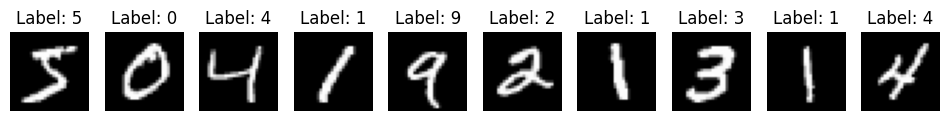

In [ ]:
# Display some images from the dataset
visualize_samples(train_dataset)

It is always important to take a look to the data distribution before building and training any kind of model. If we did not do it, we would not be able to make the correct decisions to maximize the overall performances of our system.

In [ ]:
means = []
stds = []

# Compute mean and standard deviation for each image
for img, _ in train_dataset:
    means.append(torch.mean(img).item())
    stds.append(torch.std(img).item())

In [ ]:
means = np.array(means)
stds = np.array(stds)

sample_mean = np.mean(means)
sample_std = np.mean(stds)
cumulative_prob = np.mean(means <= 0.3)


print("Sample mean:", round(sample_mean,2))
print("Sample standard deviation:", round(sample_std,2))
print(f"CDF at 0.3: {cumulative_prob:.3f}")

Sample mean: 0.13
Sample standard deviation: 0.3
CDF at 0.3: 0.999


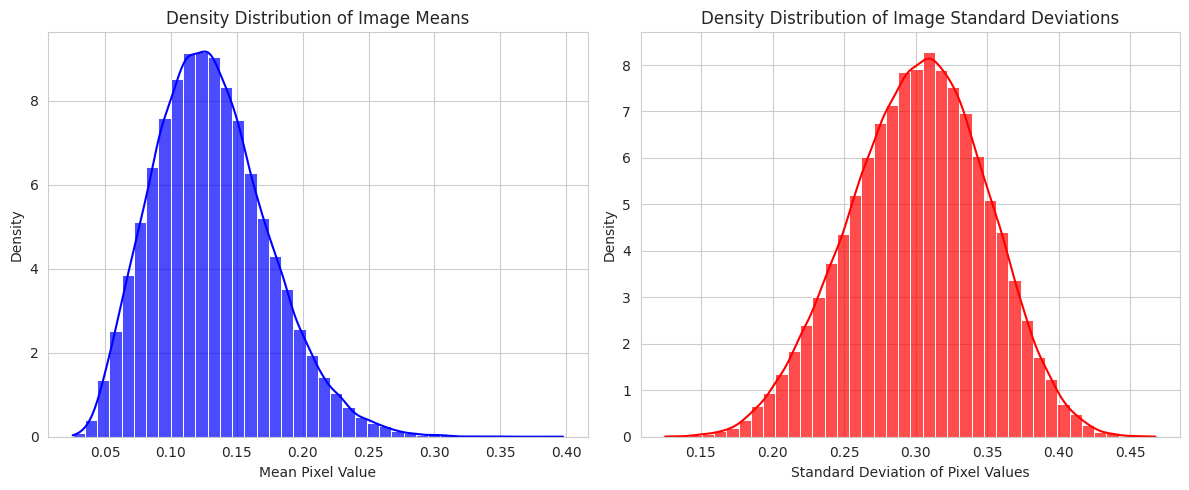

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

# Density plot for means
plt.subplot(1, 2, 1)
sns.histplot(means, bins = 40, kde = True, color = 'blue', stat = "density", alpha = 0.7)
plt.xlabel("Mean Pixel Value")
plt.ylabel("Density")
plt.title("Density Distribution of Image Means")

# Density plot for standard deviations
plt.subplot(1, 2, 2)
sns.histplot(stds, bins = 40, kde = True, color = 'red', stat = "density", alpha = 0.7)
plt.xlabel("Standard Deviation of Pixel Values")
plt.ylabel("Density")
plt.title("Density Distribution of Image Standard Deviations")

plt.tight_layout()
plt.show()

These distributions are confirming what we could have guessed even before plotting, in particular:
* The **Distribution of the Mean** of the pixels essentially reflects the fact that there are more dark pixels than light ones, which is why it is asymmetrical towards zero ;

* The **Distribution of Standard Deviations**, on the other hand, reflects the fact that $0.3$ is the variation that a pixel has to make in order to pass between being white or black. This idea is reinforced by the fact that the **CDF** : $P(X_{mean}≤0.3)=99\%$ .

Finally, it is always worth saying that those shown above are not Gaussians as predicted by the **Central Limit Theorem** since the **pixel value cannot be considered as independent variable**.

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 60000.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test p-value: 1.4677034763689157e-57
Kolmogorov-Smirnov Test p-value: 1.0183303565696078e-51
Data is NOT normally distributed.


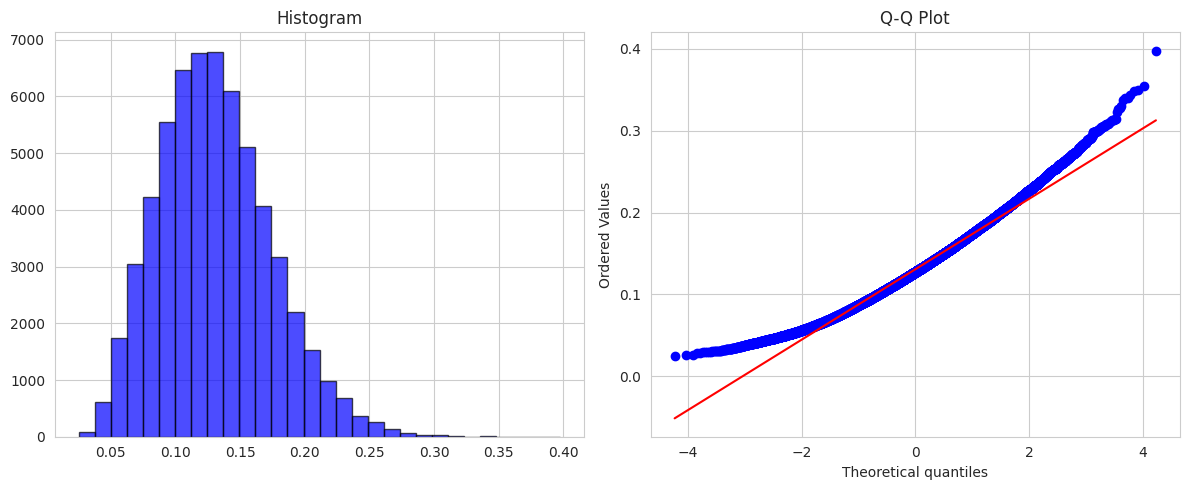

In [ ]:
check_normality(means)

Shapiro-Wilk Test p-value: 2.7178384624262934e-26
Kolmogorov-Smirnov Test p-value: 5.848337659273683e-12
Data is NOT normally distributed.


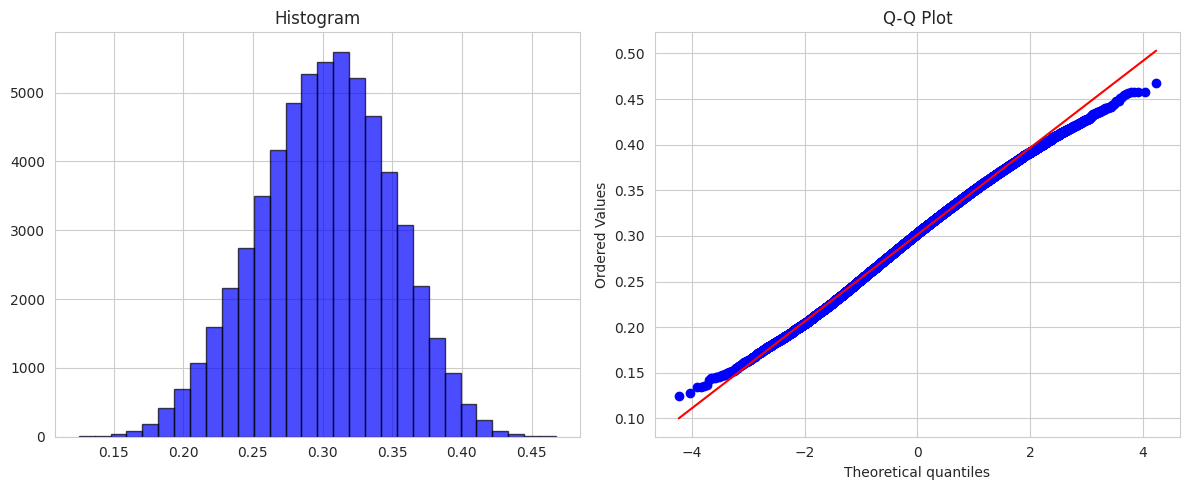

In [ ]:
check_normality(stds)

Lets' now define the Dataloader both for the original data and the normalized one.

In [ ]:
# Define transform: Convert images to tensors and normalize
transform_norm = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean = (sample_mean,), std = (sample_std,))])

# Load the MNIST dataset
Normalized_train_dataset = torchvision.datasets.MNIST(root='./data', train = True, transform = transform, download = True)
Normalized_test_dataset = torchvision.datasets.MNIST(root='./data', train = False, transform = transform, download = True)

In [ ]:
norm_means = []
norm_stds = []

# Compute mean and standard deviation for each image
for img, _ in Normalized_train_dataset:
    norm_means.append(torch.mean(img).item())
    norm_stds.append(torch.std(img).item())

Shapiro-Wilk Test p-value: 1.4677034763689157e-57
Kolmogorov-Smirnov Test p-value: 1.0183303565696078e-51
Data is NOT normally distributed.


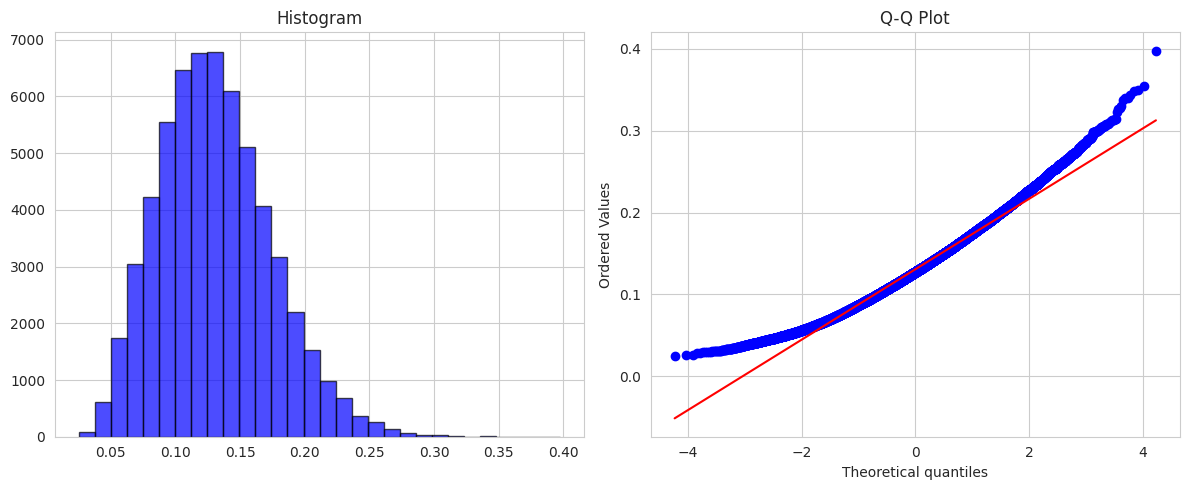

In [ ]:
check_normality(norm_means)

Shapiro-Wilk Test p-value: 2.7178384624262934e-26
Kolmogorov-Smirnov Test p-value: 5.848337659273683e-12
Data is NOT normally distributed.


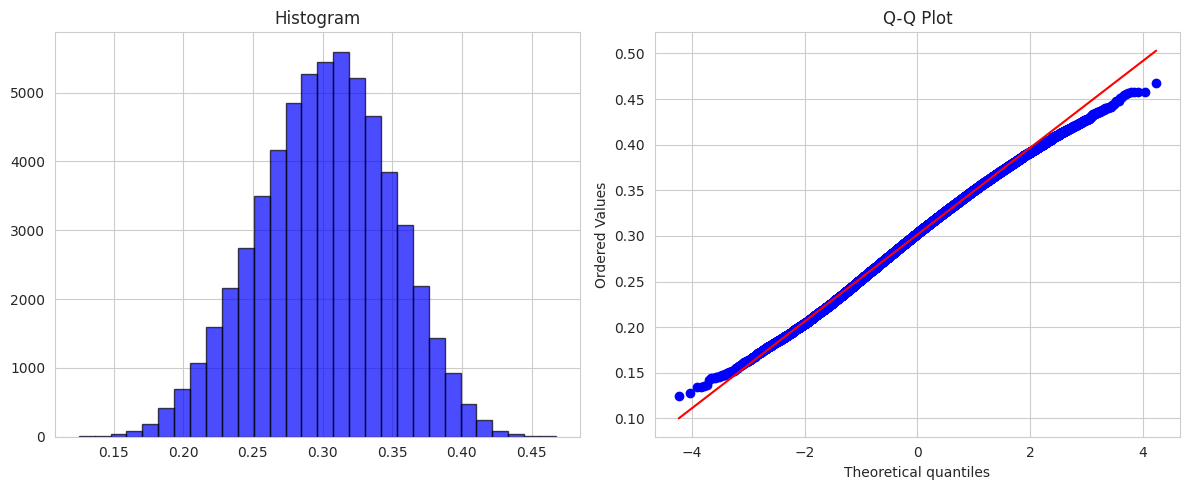

In [ ]:
check_normality(norm_stds)

As you can see the distribution of the mean and the standard deviation of the pixels values for each immage is not normally distributed both for the original data and the normalized one. I've provided to you the results of the statistc tests which confirm the premises given by the central limit theorem.  


In [ ]:
Normalized_TrainData_loader = torch.utils.data.DataLoader(Normalized_train_dataset, batch_size = 128, shuffle = True)
TrainData_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 128, shuffle = True)

In [ ]:
print("Number of batches:", len(TrainData_loader))
for immage, label in TrainData_loader:
    immage_squeezed = immage.squeeze(dim = 1)
    batch_size, channel, height, width = immage.shape[0], immage.shape[1], immage.shape[2], immage.shape[3]
    print("Shape of the image squeezed:", immage_squeezed.shape)
    print("Shape of the images:", immage.shape)
    print("Batch Size:", immage.shape[0], '- Channels:', immage.shape[1], '- Height & Width:', immage.shape[2])
    break

Number of batches: 469
Shape of the image squeezed: torch.Size([128, 28, 28])
Shape of the images: torch.Size([128, 1, 28, 28])
Batch Size: 128 - Channels: 1 - Height & Width: 28


# Convolutional Neural Network

In order to properly built a **Convolutional Neural Network** to solve an **Immage MultiClassification Task** we need of three different layer :
1. **2D-Convolutional Layer** ;
2. **Pooling Layer** ;
3. **Flatten Layer** ;
4. **Linear Layer** .

Then, both the first and the second layer functioning, can be controlled by setting **Kernel, Padding** and **Stride** size. For the purpose of using the optimal size of these parameters in according to the task to solve, we must take into account the following relationship to  calcuate the output feature map dimension :

* $$(N + 2P - K + 1) \text{ x }(M+2P-K+1)$$

Here we are assuming that our input immage it's a $N\text{ x }M$ rectangular matrix, while $K$ and $P$ are the **Kernel** and **Padding** dimensions respectively. Besides, we can also make a distinction between *valid Convlution* and *same Convolution*, the first one occurs if we set $P=0$, while the latter occurs when :

* $$P=\frac{M-1}{2}$$

As you can verify by simple calculations, this condition allow us to keep unchanged the dimension of the input data, that is why it is called **same**.

Last but not least, another foundamental parameter is the dimension of the **output channel** that allow us the select the number of the so called **Filters**, which are foundamental to let the CNN learns the latent variables rappresentation.

## CNN Architecture

In [ ]:
class ConvolutionalNN(nn.Module):
  def __init__(self, in_channels : int, output_dimension : int, kernel_size : tuple, stride : tuple, padding : tuple):
    super().__init__()

    self.in_channels = in_channels
    self.output_dimension = output_dimension
    self.kernel_size = kernel_size
    self.stride = stride
    self.padding = padding

    # Layers
    self.conv1 = nn.Conv2d(in_channels = in_channels, out_channels = 16, kernel_size = kernel_size, stride = stride, padding = padding)
    self.conv2 = nn.Conv2d(in_channels = 16, out_channels = 8, kernel_size = kernel_size, stride = stride, padding = padding)
    self.linear1 = nn.Linear(in_features = 8 * 7 * 7, out_features = 32)
    self.linear2 = nn.Linear(in_features = 32, out_features = output_dimension)

    # Activation Function
    self.ReLu = nn.ReLU()

    # Pool & Reshape
    self.MaxPool = nn.MaxPool2d(kernel_size = (2, 2), stride = (2, 2))
    self.Flatten = nn.Flatten(start_dim = 1, end_dim = -1)

  def forward(self, inputs):
    # inputs : batch_size x channel x height x width
    batch_size, channel, height, width = inputs.shape[0], inputs.shape[1], inputs.shape[2], inputs.shape[3]


    x = self.conv1(inputs)
    x = self.ReLu(x)
    x = self.MaxPool(x)

    # shape checkpoint : batch_size x out_channel_conv1 x height/2 x width/2

    x = self.conv2(x)
    x = self.ReLu(x)
    x = self.MaxPool(x)

    # shape checkpoint : batch_size x out_channel_conv2 x height/4 x width/4

    x = self.Flatten(x)

    # shape checkpoint : batch_size x (out_channel_conv2 * height/4 * width/4)

    x = self.linear1(x)
    x = self.ReLu(x)
    softmax_logits = self.linear2(x)

    return softmax_logits

In [ ]:
n_classes = len(train_dataset.class_to_idx.values())

In [ ]:
CNN_Model = ConvolutionalNN(in_channels = 1,
                            output_dimension = n_classes,
                            kernel_size = (3, 3),
                            stride = (1, 1),
                            padding = (1, 1)).to(device)

In [ ]:
loss_fn = nn.CrossEntropyLoss().to(device)
accuracy_fn = Accuracy(task = "multiclass", num_classes = n_classes).to(device)

## Training

In [ ]:
epochs = 15
batch_size = 512
learning_rate = 0.001

### Original Data

The parameters of the CNN has been choosen such that we perform what we've called  **same covolution**.

In [ ]:
%%time
TrainData_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
Validation_Data_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

CNN_Model = ConvolutionalNN(in_channels = 1,
                            output_dimension = n_classes,
                            kernel_size = (3, 3),
                            stride = (1, 1),
                            padding = (1, 1)).to(device)

optimizer = optimizer = torch.optim.Adam(CNN_Model.parameters(), lr = learning_rate)

train_losses_CNN, val_losses_CNN = [], []
train_accuracies_CNN, val_accuracies_CNN = [], []

# Training loop
for epoch in tqdm(range(1, epochs + 1), desc="Training Progress"):
    CNN_Model.train()
    total_train_loss, total_train_acc = 0, 0
    num_train_batches = 0

    for batch_image, batch_label in TrainData_loader:
        batch_image, batch_label = batch_image.to(device), batch_label.to(device)

        logits = CNN_Model(batch_image)
        loss = loss_fn(logits, batch_label)
        acc = accuracy_fn(logits, batch_label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        total_train_acc += acc.item()
        num_train_batches += 1

    mean_train_loss = total_train_loss / num_train_batches
    mean_train_acc = total_train_acc / num_train_batches
    train_losses_CNN.append(mean_train_loss)
    train_accuracies_CNN.append(mean_train_acc)

    # Validation
    CNN_Model.eval()
    total_val_loss, total_val_acc = 0, 0
    num_val_batches = 0

    with torch.no_grad():
      for batch_image, batch_label in Validation_Data_loader:
          batch_image, batch_label = batch_image.to(device), batch_label.to(device)

          logits = CNN_Model(batch_image)
          val_loss = loss_fn(logits, batch_label)
          val_acc = accuracy_fn(logits, batch_label)

          total_val_loss += val_loss.item()
          total_val_acc += val_acc.item()
          num_val_batches += 1

    mean_val_loss = total_val_loss / num_val_batches
    mean_val_acc = total_val_acc / num_val_batches
    val_losses_CNN.append(mean_val_loss)
    val_accuracies_CNN.append(mean_val_acc)

    if epoch % 5 == 0:
        print(f"Epoch {epoch}: "
              f"Train Loss: {mean_train_loss:.5f}, Train Accuracy: {mean_train_acc:.3f} | "
              f"Val Loss: {mean_val_loss:.5f}, Val Accuracy: {mean_val_acc:.3f}")

Training Progress:   0%|          | 0/15 [00:00<?, ?it/s]

Epoch 5: Train Loss: 0.12429, Train Accuracy: 0.963 | Val Loss: 0.10476, Val Accuracy: 0.968
Epoch 10: Train Loss: 0.07442, Train Accuracy: 0.978 | Val Loss: 0.06450, Val Accuracy: 0.979
Epoch 15: Train Loss: 0.05685, Train Accuracy: 0.983 | Val Loss: 0.05087, Val Accuracy: 0.983
CPU times: user 1min 54s, sys: 540 ms, total: 1min 54s
Wall time: 1min 56s


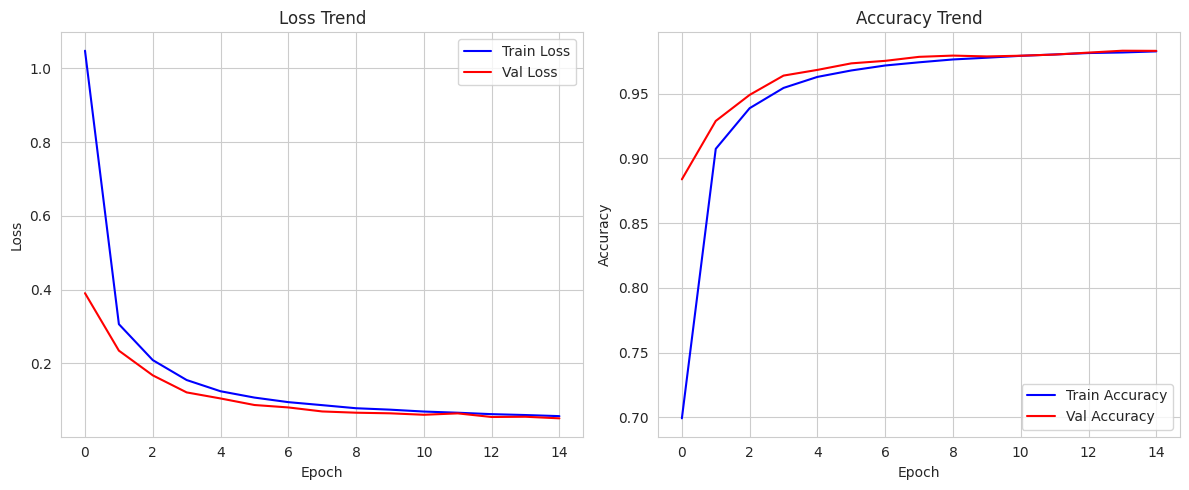

In [ ]:
plot_training_results(epochs, train_losses_CNN, val_losses_CNN, train_accuracies_CNN, val_accuracies_CNN)

As expected, since the task is really easy to solve, the model behaviour does not show overfitting issues, on the contrary it seems to have a pretty good generalization power in according to the validation data response.

### Normalized Data

In [ ]:
%%time
TrainData_loader = torch.utils.data.DataLoader(Normalized_train_dataset, batch_size = batch_size, shuffle = True)
Validation_Data_loader = torch.utils.data.DataLoader(Normalized_test_dataset, batch_size = batch_size, shuffle = True)

CNN_Model = ConvolutionalNN(in_channels = 1,
                            output_dimension = n_classes,
                            kernel_size = (3, 3),
                            stride = (1, 1),
                            padding = (1, 1)).to(device)

optimizer = optimizer = torch.optim.Adam(CNN_Model.parameters(), lr = learning_rate)

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training loop
for epoch in tqdm(range(1, epochs + 1), desc="Training Progress"):
    CNN_Model.train()
    total_train_loss, total_train_acc = 0, 0
    num_train_batches = 0

    for batch_image, batch_label in TrainData_loader:
        batch_image, batch_label = batch_image.to(device), batch_label.to(device)

        logits = CNN_Model(batch_image)
        loss = loss_fn(logits, batch_label)
        acc = accuracy_fn(logits, batch_label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        total_train_acc += acc.item()
        num_train_batches += 1

    mean_train_loss = total_train_loss / num_train_batches
    mean_train_acc = total_train_acc / num_train_batches
    train_losses.append(mean_train_loss)
    train_accuracies.append(mean_train_acc)

    # Validation
    CNN_Model.eval()
    total_val_loss, total_val_acc = 0, 0
    num_val_batches = 0

    with torch.no_grad():
      for batch_image, batch_label in Validation_Data_loader:
          batch_image, batch_label = batch_image.to(device), batch_label.to(device)

          logits = CNN_Model(batch_image)
          val_loss = loss_fn(logits, batch_label)
          val_acc = accuracy_fn(logits, batch_label)

          total_val_loss += val_loss.item()
          total_val_acc += val_acc.item()
          num_val_batches += 1

    mean_val_loss = total_val_loss / num_val_batches
    mean_val_acc = total_val_acc / num_val_batches
    val_losses.append(mean_val_loss)
    val_accuracies.append(mean_val_acc)

    if epoch % 5 == 0:
        print(f"Epoch {epoch}: "
              f"Train Loss: {mean_train_loss:.5f}, Train Accuracy: {mean_train_acc:.3f} | "
              f"Val Loss: {mean_val_loss:.5f}, Val Accuracy: {mean_val_acc:.3f}")

Training Progress:   0%|          | 0/15 [00:00<?, ?it/s]

Epoch 5: Train Loss: 0.12467, Train Accuracy: 0.963 | Val Loss: 0.10252, Val Accuracy: 0.967
Epoch 10: Train Loss: 0.07155, Train Accuracy: 0.978 | Val Loss: 0.06433, Val Accuracy: 0.978
Epoch 15: Train Loss: 0.05700, Train Accuracy: 0.982 | Val Loss: 0.05377, Val Accuracy: 0.983
CPU times: user 1min 54s, sys: 328 ms, total: 1min 55s
Wall time: 1min 55s


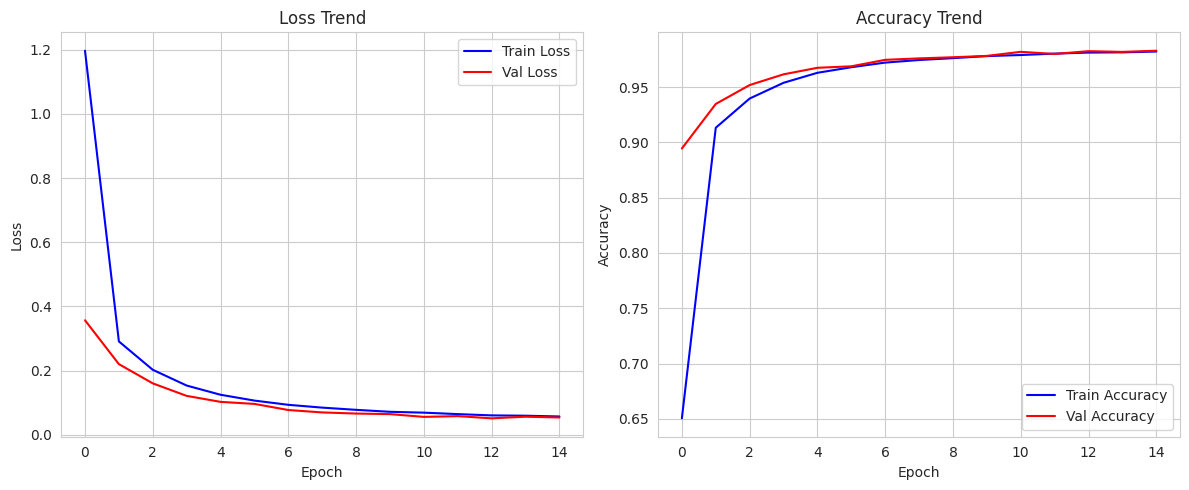

In [ ]:
plot_training_results(epochs, train_losses, val_losses, train_accuracies, val_accuracies)

It seems that at this level of complexity the  Data Normalization does not lead to better performances of the model, both for the resulting metrics and the computation time.

### Model Summary

Now, there exists one library called [torchsummary](https://pypi.org/project/torch-summary/) but, as you can read at the link, torch-summary has been renamed to [torchinfo]().

Torchinfo provides information complementary to what is provided by `print(your_model)` in PyTorch, similar to Tensorflow's `model.summary()` API to view the visualization of the model, which is helpful while debugging your network.

In [ ]:
CNN_SUMMARY = summary(CNN_Model,
                      input_size = (batch_size, channel, height, width),
                      col_names=["input_size", "output_size", "num_params", "trainable"],
                      mode = 'train',
                      col_width = 20,
                      depth = 3,
                      row_settings=["var_names"],
                      verbose = 2)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ConvolutionalNN (ConvolutionalNN)        [512, 1, 28, 28]     [512, 10]            --                   True
├─Conv2d (conv1)                         [512, 1, 28, 28]     [512, 16, 28, 28]    160                  True
│    └─weight                                                                      ├─144
│    └─bias                                                                        └─16
├─ReLU (ReLu)                            [512, 16, 28, 28]    [512, 16, 28, 28]    --                   --
├─MaxPool2d (MaxPool)                    [512, 16, 28, 28]    [512, 16, 14, 14]    --                   --
├─Conv2d (conv2)                         [512, 16, 14, 14]    [512, 8, 14, 14]     1,160                True
│    └─weight                                                                      ├─1,152
│    └─bias                                                                  

# CNN vs FFNN

In this section i will show how to solve the same problem by using a FFNN instead of a CNN. As you will see, you can apply the FFNN only after the flattening of the immage given as input. In other words we only have to reshape the immage such that :
* $$N\text{ x }M∈ℜ^2 \to N⋅M \in ℜ^1$$

From now on, one have to built the architecture of the network as usual. In addition it's important to underline that, uder the assumption that we set the size of the kernel equal to the size of the immage, the operations of a linear layer is equal to the operations performed by a 2D convolutional layer. On the other hand, it is still necessary to reduce the size of the flowing data using the size of the pooling operation, which is not used in a FFNN as you may know.

## FFNN Architecture

In [ ]:
class FeedForward_NN(nn.Module):
  def __init__(self, input_units : int, output_units : int, hidden_units_1 : int, hidden_units_2 : int, hidden_units_3 : int, hidden_units_4 : int, hidden_units_5 : int, hidden_units_6 : int, hidden_units_7 : int):
    super().__init__()

    # Number of Nodes
    self.input_units = input_units

    self.hidden_units_1 = hidden_units_1
    self.hidden_units_2 = hidden_units_2
    self.hidden_units_3 = hidden_units_3
    self.hidden_units_4 = hidden_units_4
    self.hidden_units_5 = hidden_units_5
    self.hidden_units_6 = hidden_units_6
    self.hidden_units_7 = hidden_units_7
    self.output_units = output_units

    # Architecture
    self.input_layer = nn.Linear(self.input_units, self.hidden_units_1)
    self.hidden_layer_1 = nn.Linear(self.hidden_units_1, self.hidden_units_2)
    self.hidden_layer_2 = nn.Linear(self.hidden_units_2, self.hidden_units_3)
    self.hidden_layer_3 = nn.Linear(self.hidden_units_3, self.hidden_units_4)
    self.hidden_layer_4 = nn.Linear(self.hidden_units_4, self.hidden_units_5)
    self.hidden_layer_5 = nn.Linear(self.hidden_units_5, self.hidden_units_6)
    self.hidden_layer_6 = nn.Linear(self.hidden_units_6, self.hidden_units_7)
    self.output_layer = nn.Linear(self.hidden_units_7, self.output_units)

    # Activation Function
    self.relu = nn.ReLU()
    self.flatten = nn.Flatten(start_dim = 1, end_dim = -1)

  def forward(self, inputs):
    # inputs : batch_size x channel x height x width

    x = self.flatten(inputs)

    # Immage to flat vector --> batch_size x (channel * height * width)

    x = self.relu(self.input_layer(x))
    x = self.relu(self.hidden_layer_1(x))
    x = self.relu(self.hidden_layer_2(x))
    x = self.relu(self.hidden_layer_3(x))
    x = self.relu(self.hidden_layer_4(x))
    x = self.relu(self.hidden_layer_5(x))
    x = self.relu(self.hidden_layer_6(x))
    logits = self.output_layer(x)

    return logits

In [ ]:
loss_fn = nn.CrossEntropyLoss().to(device)
accuracy_fn = Accuracy(task = "multiclass", num_classes = n_classes).to(device)

## Training

In [ ]:
input_dimension = channel * height * width
epochs = 15
batch_size = 512
learning_rate = 0.001

In [ ]:
%%time
TrainData_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
Validation_Data_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

FFNN_Model = FeedForward_NN(input_units = input_dimension ,
                            output_units = n_classes,
                            hidden_units_1 = 512,
                            hidden_units_2 = 256,
                            hidden_units_3 = 128,
                            hidden_units_4 = 128,
                            hidden_units_5 = 64,
                            hidden_units_6 = 32,
                            hidden_units_7 = 32).to(device)
optimizer = optimizer = torch.optim.Adam(FFNN_Model.parameters(), lr = learning_rate)

train_losses_FFNN, val_losses_FFNN = [], []
train_accuracies_FFNN, val_accuracies_FFNN = [], []

# Training loop
for epoch in tqdm(range(1, epochs + 1), desc = "Training Progress"):
    FFNN_Model.train()
    total_train_loss, total_train_acc = 0, 0
    num_train_batches = 0

    for batch_image, batch_label in TrainData_loader:
        batch_image, batch_label = batch_image.to(device), batch_label.to(device)

        logits = FFNN_Model(batch_image)
        loss = loss_fn(logits, batch_label)
        acc = accuracy_fn(logits, batch_label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        total_train_acc += acc.item()
        num_train_batches += 1

    mean_train_loss = total_train_loss / num_train_batches
    mean_train_acc = total_train_acc / num_train_batches
    train_losses_FFNN.append(mean_train_loss)
    train_accuracies_FFNN.append(mean_train_acc)

    # Validation
    FFNN_Model.eval()
    total_val_loss, total_val_acc = 0, 0
    num_val_batches = 0

    with torch.no_grad():
      for batch_image, batch_label in Validation_Data_loader:
          batch_image, batch_label = batch_image.to(device), batch_label.to(device)

          logits = FFNN_Model(batch_image)
          val_loss = loss_fn(logits, batch_label)
          val_acc = accuracy_fn(logits, batch_label)

          total_val_loss += val_loss.item()
          total_val_acc += val_acc.item()
          num_val_batches += 1

    mean_val_loss = total_val_loss / num_val_batches
    mean_val_acc = total_val_acc / num_val_batches
    val_losses_FFNN.append(mean_val_loss)
    val_accuracies_FFNN.append(mean_val_acc)

    if epoch % 5 == 0:
        print(f"Epoch {epoch}: "
              f"Train Loss: {mean_train_loss:.5f}, Train Accuracy: {mean_train_acc:.3f} | "
              f"Val Loss: {mean_val_loss:.5f}, Val Accuracy: {mean_val_acc:.3f}")

Training Progress:   0%|          | 0/15 [00:00<?, ?it/s]

Epoch 5: Train Loss: 0.12581, Train Accuracy: 0.964 | Val Loss: 0.15003, Val Accuracy: 0.959
Epoch 10: Train Loss: 0.04256, Train Accuracy: 0.988 | Val Loss: 0.10317, Val Accuracy: 0.972
Epoch 15: Train Loss: 0.01911, Train Accuracy: 0.994 | Val Loss: 0.11394, Val Accuracy: 0.975
CPU times: user 1min 57s, sys: 411 ms, total: 1min 58s
Wall time: 1min 58s


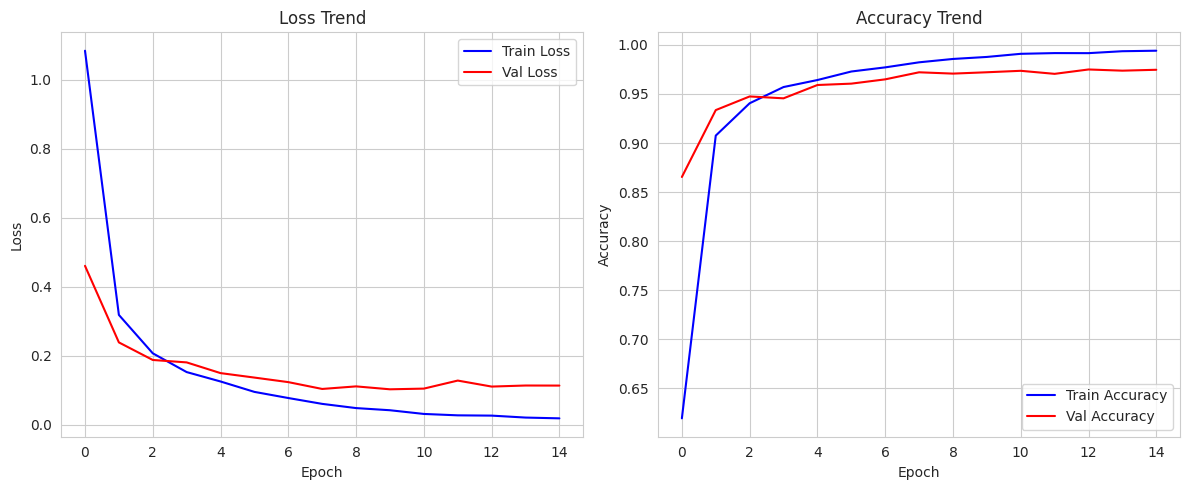

In [ ]:
plot_training_results(epochs, train_losses_FFNN, val_losses_FFNN, train_accuracies_FFNN, val_accuracies_FFNN)

One would argue that, since the models achive almost the same accuracy value within the same number of epochs, there is no particular motivation to prefer a CNN instead of a FFNN, of course this is not true.

We must always keep in mind that :
1. We are working to solve a really simple task, then it is normal that a lot of subtleties do not make the difference, it has happened the same for the normalization of the data ;

2. The CNN it is "just" an **optimized version** of a FFNN but they are conceptually the same. The convolutional operation performed using the Kernel it's a brilliant way to emphatize the so called **Locality** property while the shift of the Kernel along the input immages, controlled by the stride parameter, it's the mechanism thanks to which we can talk about the **Translational Invariance**. The last but not the least, the pooling operation gives rise to the **hierarchy** property which is the capability of the model to compress a given portion of an immage, and so a certain amount of pixel. More precisely we can talk about the so called  **Receptive Field** that refers to the region of the input image that a particular neuron  is influenced by. It determines how much of the original input image a neuron "sees" and contributes to its activation ;

3. The CNN drastically reduce the number of trainable parameters needed by using all the operation discussed above. This can highly affect the model performances in real case scenarios.

### Models Summary

In [ ]:
FFNN_SUMMARY = summary(FFNN_Model,
                      input_size = (batch_size, channel * height * width),
                      col_names=["input_size", "output_size", "num_params", "trainable"],
                      mode = 'train',
                      col_width = 20,
                      depth = 3,
                      row_settings=["var_names"],
                      verbose = 2)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
FeedForward_NN (FeedForward_NN)          [512, 784]           [512, 10]            --                   True
├─Flatten (flatten)                      [512, 784]           [512, 784]           --                   --
├─Linear (input_layer)                   [512, 784]           [512, 512]           401,920              True
│    └─weight                                                                      ├─401,408
│    └─bias                                                                        └─512
├─ReLU (relu)                            [512, 512]           [512, 512]           --                   --
├─Linear (hidden_layer_1)                [512, 512]           [512, 256]           131,328              True
│    └─weight                                                                      ├─131,072
│    └─bias                                                           

In [ ]:
CNN_SUMMARY

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ConvolutionalNN (ConvolutionalNN)        [512, 1, 28, 28]     [512, 10]            --                   True
├─Conv2d (conv1)                         [512, 1, 28, 28]     [512, 16, 28, 28]    160                  True
│    └─weight                                                                      ├─144
│    └─bias                                                                        └─16
├─ReLU (ReLu)                            [512, 16, 28, 28]    [512, 16, 28, 28]    --                   --
├─MaxPool2d (MaxPool)                    [512, 16, 28, 28]    [512, 16, 14, 14]    --                   --
├─Conv2d (conv2)                         [512, 16, 14, 14]    [512, 8, 14, 14]     1,160                True
│    └─weight                                                                      ├─1,152
│    └─bias                                                                  

* **CNN Trainable Params** : $14.226$ ;
* **FFNN Trainable Params** : $ 594.378$ .